### Patient info_cfg file analysis

In [30]:
import sys
import gzip
import os
import glob
import pandas as pd

In [14]:
rootdir = os.path.abspath('PATH')

In [31]:
df = pd.DataFrame(columns=['patient_id', 'ED_frame', 'ES_frame','group','height','weight','NbFrame'])

In [1]:
for filename in glob.iglob(rootdir + '**/*', recursive=True):
  

SyntaxError: unexpected EOF while parsing (<ipython-input-1-ddd5292b70eb>, line 2)

In [82]:
path=rootdir
dict={}
for root, subdirs, files in os.walk(path):
    for file in os.listdir(root):
        filePath = os.path.join(root, file)       
        if filePath.endswith('cfg'):     
            infos = {}          
            patient_id = os.path.basename(root)                      
            for line in open(filePath):                
                label, value = line.split(':')                
                infos[label] = value.rstrip('\n').lstrip(' ')            
            ED_frame = int(infos['ED'])
            ES_frame = int(infos['ES'])
            height=float(infos['Height'])
            weight=float(infos['Weight'])
            group=infos['Group']
            NbFrame=infos['NbFrame']
            dict[patient_id]=infos
          

In [84]:
df = pd.DataFrame(dict)

In [95]:
tdf=df.transpose()

In [94]:
df

,patient001,patient002,patient003,patient004,patient005,patient006,patient007,patient008,patient009,patient010,...,patient091,patient092,patient093,patient094,patient095,patient096,patient097,patient098,patient099,patient100
ED,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ES,12,12,15,15,13,16,7,13,13,13,...,9,6,14,7,12,8,11,9,9,13
Group,DCM,DCM,DCM,DCM,DCM,DCM,DCM,DCM,DCM,DCM,...,RV,RV,RV,RV,RV,RV,RV,RV,RV,RV
Height,184.0,160.0,165.0,159.0,165.0,180.0,173.0,180.0,153.0,170.0,...,162.0,170.0,165,164.0,165.0,186,187,167,180,165
NbFrame,30,30,30,28,30,28,16,28,35,28,...,16,15,30,14,30,15,30,22,19,34
Weight,95.0,70.0,77.0,46.0,77.0,70.0,107.0,100.0,61.0,68.0,...,53.0,69.0,65,45.0,76.0,76,82,50,80,63


In [100]:
tdf.index.name='Patient'

In [101]:
tdf

,ED,ES,Group,Height,NbFrame,Weight
Patient,,,,,,
patient001,1,12,DCM,184.0,30,95.0
patient002,1,12,DCM,160.0,30,70.0
patient003,1,15,DCM,165.0,30,77.0
patient004,1,15,DCM,159.0,28,46.0
patient005,1,13,DCM,165.0,30,77.0
patient006,1,16,DCM,180.0,28,70.0
patient007,1,7,DCM,173.0,16,107.0
patient008,1,13,DCM,180.0,28,100.0
patient009,1,13,DCM,153.0,35,61.0


In [102]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

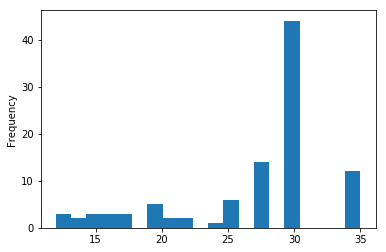

In [112]:
tdf['NbFrame'].plot(kind='hist',bins=20)

In [105]:
tdf.dtypes

ED         object
ES         object
Group      object
Height     object
NbFrame    object
Weight     object
dtype: object

In [106]:
tdf['NbFrame'] = tdf['NbFrame'].astype('int') 